In [1]:
from __future__ import division
import os, os.path
import glob
import sys
import re
import Clusters as c
import numpy as np
import astropy
from matplotlib import pyplot as plt, rc
from astropy.cosmology import Planck15
from astropy import cosmology
from astropy import units as u
from collections import Counter
import h5py
sys.path.insert(0, '/cosma5/data/dp004/dc-beck3')
import readlensing as rf
import readsnap

rc('figure', figsize=(8,6))
rc('font', size=18)
rc('lines', linewidth=3)
rc('axes', linewidth=2)
rc('xtick.major', width=2)
rc('ytick.major', width=2)

In [5]:
LCSettings = '/cosma5/data/dp004/dc-beck3/shell_script/LCSettings.txt'
sim_dir, sim_phy, sim_name, sim_col, hd_dir, lc_dir, glafic_dir, HQ_dir = rf.Simulation_Specs(LCSettings)
lens_dir = '/cosma5/data/dp004/dc-beck3/LensingMap/'

h = 0.6774
labels = ['FP_GR', 'FP_F6']
colour = ['r', 'b']

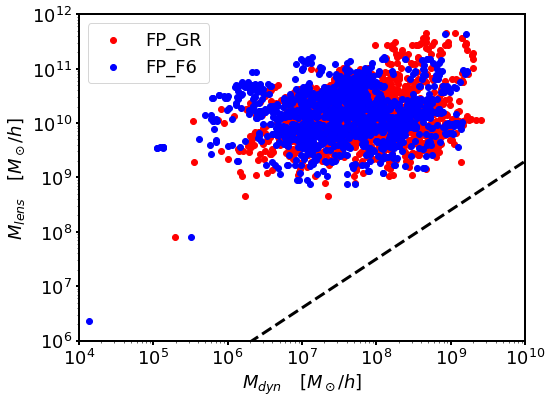

In [9]:
for sim in range(len(sim_dir))[:]:
    # Simulation Snapshots
    snapfile = sim_dir[sim]+'snapdir_%03d/snap_%03d'
    # LensingAnalysis file
    la_dir = HQ_dir+'LensingAnalysis/'+sim_phy[sim] + \
             'DynLensMass_'+sim_name[sim]+'.h5'

    LM = h5py.File(la_dir)
    
    Mdyn = LM['Mdyn'].value
    Mlens = LM['Mlens'].value
    
    plt.loglog()
    plt.scatter(Mdyn, Mlens, c=colour[sim], label=labels[sim])
plt.plot([1e3, 1e12], [1e3, 1e12], '--k')
plt.xlim(1e4, 1e10)
plt.ylim(1e6, 1e12)
plt.xlabel(r'$M_{dyn} \quad [M_\odot/h$]')
plt.ylabel(r'$M_{lens} \quad [M_\odot/h]$')
plt.legend(loc=2)
plt.show()